In [1]:
#based on https://github.com/grantas33/Google-dinosaur-with-OpenCV

# Done by Frannecklp

import cv2
import numpy as np
import win32gui, win32ui, win32con, win32api
import pyautogui

def grab_screen(region=None):

    hwin = win32gui.GetDesktopWindow()

    if region:
        left,top,x2,y2 = region
        width = x2 - left + 1
        height = y2 - top + 1
    else:
        width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
        height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
        left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
        top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)

    hwindc = win32gui.GetWindowDC(hwin)
    srcdc = win32ui.CreateDCFromHandle(hwindc)
    memdc = srcdc.CreateCompatibleDC()
    bmp = win32ui.CreateBitmap()
    bmp.CreateCompatibleBitmap(srcdc, width, height)
    memdc.SelectObject(bmp)
    memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)
    
    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height,width,4)

    srcdc.DeleteDC()
    memdc.DeleteDC()
    win32gui.ReleaseDC(hwin, hwindc)
    win32gui.DeleteObject(bmp.GetHandle())

    return cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

In [2]:
import cv2
import numpy as np
import glob
#import pyautogui
import time

In [3]:
dino = cv2.imread('dino.png', 0)
w_dino, h_dino = dino.shape[::-1]

In [28]:
files = glob.glob ('cacti/*.png')   
cacti = []       
for file in files:
    temp=cv2.imread(file, 0)  
    cacti.append(temp)

In [29]:
len(cacti)

2

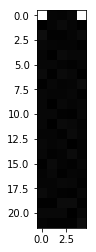

In [30]:
import matplotlib.pyplot as plt

arr = np.asarray(cacti[1])
plt.imshow(arr, cmap='gray')
plt.show()

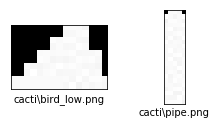

In [31]:
plt.figure(figsize=(10,10))
for i in range(len(cacti)):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cacti[i], cmap=plt.cm.binary)
    plt.xlabel(files[i])

In [33]:
second = time.time() 
start_time = time.time()
obstacle_height = 0
should_crouch = False
jumpdist = 175
is_crouching = False
MAX_SPEED_TIME = 118
DINO_WALKING_HEIGHT = 80
dinoX = 0
#threshold = 0.7

while(True):
    leftest = 1000     
    if (time.time() - second >= 1 and time.time() - start_time < MAX_SPEED_TIME):
        jumpdist += 1.7
        second = time.time() 
    
    pts = []
    scr = grab_screen(region=(75,250, 750, 450))
    
    scr_gray = cv2.cvtColor(scr, cv2.COLOR_BGR2GRAY)    
    
    res_dino = cv2.matchTemplate(scr_gray, dino, cv2.TM_CCOEFF_NORMED)
    
    threshold = 0.7
    loc_dino = np.where(res_dino >= threshold)
    
    for pt in zip(*loc_dino[::-1]):        
        cv2.rectangle(scr, pt, (pt[0] + w_dino, pt[1] + h_dino + 9), (50,205,50), 1)
        dinoX = pt[0] + w_dino
        dinoH = pt[1]
        print('d x d h', dinoX, dinoH)
        is_crouching = False
    for cactus in cacti: 
        res = cv2.matchTemplate(scr_gray, cactus, cv2.TM_CCOEFF_NORMED)
        w, h = cactus.shape[::-1]
        loc = np.where(res >= threshold)
        for pt in zip(*loc[::-1]):
            #if(pt in pts):
            #    continue
            cv2.rectangle(scr, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 1)
            pts.append(pt)
            if(leftest > pt[0] + w and pt[0] > dinoX):
                leftest = pt[0] + w
                obstacle_height = h
                if h < 20 and pt[1] + 5 < dinoH:
                    should_crouch = True
                elif should_crouch == True:
                    should_crouch = False
                    cv2.putText(scr, 'Crouch!', (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)
                    pyautogui.keyUp('down')
    
    if leftest - dinoX < jumpdist - obstacle_height and should_crouch == False:
        if dinoH > DINO_WALKING_HEIGHT:
            cv2.putText(scr, 'Jump!', (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)
            pyautogui.press('space')
    elif should_crouch == True:
        if is_crouching == False:
            cv2.putText(scr, 'Crouch!', (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (30, 255, 10), 2, cv2.LINE_AA) 
            pyautogui.keyDown('down')
            is_crouching = True
            
  
    cv2.imshow('screen', scr) 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d h 47 80
d x d h 48 80
d x d h 49 80
d x d h 50 80
d x d h 51 80
d x d h 47 81
d x d h 48 81
d x d h 49 81
d x d h 50 81
d x d h 51 81
d x d h 47 82
d x d h 48 82
d x d h 49 82
d x d h 50 82
d x d h 51 82
d x d h 47 83
d x d h 48 83
d x d h 49 83
d x d h 50 83
d x d h 51 83
d x d h 48 84
d x d h 49 84
d x d h 50 84
d x d h 48 85
d x d h 49 85
d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d h 47 80
d x d h 48 80
d x d h 49 80
d x d h 50 80
d x d h 51 80
d x d h 47 81
d x d h 48 81
d x d h 49 81
d x d h 50 81
d x d h 51 81
d x d h 47 82
d x d h 48 82
d x d h 49 82
d x d h 50 82
d x d h 51 82
d x d h 47 83
d x d h 48 83
d x d h 49 83
d x d h 50 83
d x d h 51 83
d x d h 48 84
d x d h 49 84
d x d h 50 84
d x d h 48 85
d x d h 49 85
d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d 

d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d h 47 80
d x d h 48 80
d x d h 49 80
d x d h 50 80
d x d h 51 80
d x d h 47 81
d x d h 48 81
d x d h 49 81
d x d h 50 81
d x d h 51 81
d x d h 47 82
d x d h 48 82
d x d h 49 82
d x d h 50 82
d x d h 51 82
d x d h 47 83
d x d h 48 83
d x d h 49 83
d x d h 50 83
d x d h 51 83
d x d h 48 84
d x d h 49 84
d x d h 50 84
d x d h 48 85
d x d h 49 85
d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d h 47 80
d x d h 48 80
d x d h 49 80
d x d h 50 80
d x d h 51 80
d x d h 47 81
d x d h 48 81
d x d h 49 81
d x d h 50 81
d x d h 51 81
d x d h 47 82
d x d h 48 82
d x d h 49 82
d x d h 50 82
d x d h 51 82
d x d h 47 83
d x d h 48 83
d x d h 49 83
d x d h 50 83
d x d h 51 83
d x d h 48 84
d x d h 49 84
d x d h 50 84
d x d h 48 85
d x d h 49 85
d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d h 47 80
d x d h 48 80
d x d 

d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d h 47 80
d x d h 48 80
d x d h 49 80
d x d h 50 80
d x d h 51 80
d x d h 47 81
d x d h 48 81
d x d h 49 81
d x d h 50 81
d x d h 51 81
d x d h 47 82
d x d h 48 82
d x d h 49 82
d x d h 50 82
d x d h 51 82
d x d h 47 83
d x d h 48 83
d x d h 49 83
d x d h 50 83
d x d h 51 83
d x d h 48 84
d x d h 49 84
d x d h 50 84
d x d h 48 85
d x d h 49 85
d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d h 47 80
d x d h 48 80
d x d h 49 80
d x d h 50 80
d x d h 51 80
d x d h 47 81
d x d h 48 81
d x d h 49 81
d x d h 50 81
d x d h 51 81
d x d h 47 82
d x d h 48 82
d x d h 49 82
d x d h 50 82
d x d h 51 82
d x d h 47 83
d x d h 48 83
d x d h 49 83
d x d h 50 83
d x d h 51 83
d x d h 48 84
d x d h 49 84
d x d h 50 84
d x d h 48 85
d x d h 49 85
d x d h 49 78
d x d h 50 78
d x d h 51 78
d x d h 48 79
d x d h 49 79
d x d h 50 79
d x d h 51 79
d x d 

In [ ]:
video_capture.release()
cv2.destroyAllWindows()

In [19]:
pts = []
scr = grab_screen(region=(75,250, 750, 450))
# scr = cv2.cvtColor(scr, cv2.COLOR_BGR2RGB)
scr_gray = cv2.cvtColor(scr, cv2.COLOR_BGR2GRAY)    

res_dino = cv2.matchTemplate(scr_gray, dino, cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc_dino = np.where(res_dino >= threshold)


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [20]:
for pt in zip(*loc_dino[::-1]):        
    cv2.rectangle(scr, pt, (pt[0] + w_dino, pt[1] + h_dino + 9), (50,205,50), 1)
    print('loc ', pt[0], pt[1])

loc  7 164


In [21]:
cv2.imshow('screen', scr) 
if cv2.waitKey(1) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [15]:
scr = grab_screen()
cv2.imwrite('res.png', src)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


NameError: name 'src' is not defined

In [23]:
s = grab_screen(region=(75,250, 750, 450))

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [24]:
cv2.imwrite('r.png', s)

True

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('r.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('dino.jpg',0)

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc

h, w = template.shape

bottom_right = (top_left[0] + w, top_left[1]+h)

cv2.rectangle(img_rgb, top_left, bottom_right, 255, 2)
cv2.imwrite('res.png',img_rgb)

(167, 637)
0.785610556602478
(-0.44313403964042664, 0.785610556602478, (17, 143), (11, 118))


True

In [100]:
def grab_location(grayScaleFrame, grayImgRef):
    img_gray = grayScaleFrame
    template = grayImgRef
    threshold = 0.7

    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc

    h, w = template.shape

    bottom_right = (top_left[0] + w, top_left[1]+h)
    
    
    res_dino = cv2.matchTemplate(scr_gray, dino, cv2.TM_CCOEFF_NORMED)
    
    loc_dino = np.where(res_dino >= threshold)
    
    
    pts = np.array([(int(top_left[0]), int(top_left[1]), int(w), int(h))])
    
    return pts.astype(int)

    #cv2.rectangle(img_rgb, top_left, bottom_right, 255, 2)
    #cv2.imwrite('res.png',img_rgb)

In [101]:
import cv2
import numpy as np

In [108]:
dino_tmp = cv2.imread('dino.jpg', 0)
c = cv2.imread('cactus_big2.jpg', 0)
c1 = cv2.imread('cactus2.jpg', 0)
c2 = cv2.imread('cactus3.jpg', 0)
#c = cv2.imread('cactus_big2.jpg', 0)

In [112]:
#detect
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    dino = grab_location(gray, dino_tmp)
    cac = grab_location(gray, c)
    cac1 = grab_location(gray, c1)
    cac2 = grab_location(gray, c2)
    
    dets = np.array([dino, cac])
    #print('dino shape ', dino.shape)
    #faces = faceCascade.detectMultiScale(gray)
    #dets = dino
    
    #print('dts shape ', dets.shape)
    
    print(dets)
    
    for dt in dets:
        for x, y, w, h in dt:
            print('x y w h ', int(x), int(y), int(w), int(h))
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    cv2.imshow('video', frame)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video_capture.release()
cv2.destroyAllWindows()

[[[468 337  40  35]]

 [[498 450  23  30]]]
x y w h  468 337 40 35
x y w h  498 450 23 30
[[[468 338  40  35]]

 [[477 350  23  30]]]
x y w h  468 338 40 35
x y w h  477 350 23 30
[[[494 176  40  35]]

 [[319 387  23  30]]]
x y w h  494 176 40 35
x y w h  319 387 23 30
[[[468 338  40  35]]

 [[368 373  23  30]]]
x y w h  468 338 40 35
x y w h  368 373 23 30
[[[468 338  40  35]]

 [[350 371  23  30]]]
x y w h  468 338 40 35
x y w h  350 371 23 30
[[[469 338  40  35]]

 [[493 240  23  30]]]
x y w h  469 338 40 35
x y w h  493 240 23 30
[[[469 337  40  35]]

 [[368 372  23  30]]]
x y w h  469 337 40 35
x y w h  368 372 23 30
[[[468 338  40  35]]

 [[493 240  23  30]]]
x y w h  468 338 40 35
x y w h  493 240 23 30
[[[469 337  40  35]]

 [[590 430  23  30]]]
x y w h  469 337 40 35
x y w h  590 430 23 30
[[[469 336  40  35]]

 [[497 450  23  30]]]
x y w h  469 336 40 35
x y w h  497 450 23 30
[[[468 338  40  35]]

 [[418 360  23  30]]]
x y w h  468 338 40 35
x y w h  418 360 23 30
[[[469 337

[[[ 53 394  40  35]]

 [[432 399  23  30]]]
x y w h  53 394 40 35
x y w h  432 399 23 30
[[[ 48 388  40  35]]

 [[427 390  23  30]]]
x y w h  48 388 40 35
x y w h  427 390 23 30
[[[ 42 380  40  35]]

 [[420 378  23  30]]]
x y w h  42 380 40 35
x y w h  420 378 23 30
[[[ 37 367  40  35]]

 [[414 365  23  30]]]
x y w h  37 367 40 35
x y w h  414 365 23 30
[[[ 28 361  40  35]]

 [[406 359  23  30]]]
x y w h  28 361 40 35
x y w h  406 359 23 30
[[[ 30 362  40  35]]

 [[407 361  23  30]]]
x y w h  30 362 40 35
x y w h  407 361 23 30
[[[ 30 369  40  35]]

 [[406 369  23  30]]]
x y w h  30 369 40 35
x y w h  406 369 23 30
[[[ 26 370  40  35]]

 [[401 370  23  30]]]
x y w h  26 370 40 35
x y w h  401 370 23 30
[[[ 21 367  40  35]]

 [[394 368  23  30]]]
x y w h  21 367 40 35
x y w h  394 368 23 30
[[[ 14 362  40  35]]

 [[385 365  23  30]]]
x y w h  14 362 40 35
x y w h  385 365 23 30
[[[ 16 367  40  35]]

 [[385 374  23  30]]]
x y w h  16 367 40 35
x y w h  385 374 23 30
[[[ 19 366  40  35]]


[[[ 88 283  40  35]]

 [[151  94  23  30]]]
x y w h  88 283 40 35
x y w h  151 94 23 30
[[[ 82 279  40  35]]

 [[367 110  23  30]]]
x y w h  82 279 40 35
x y w h  367 110 23 30
[[[ 75 282  40  35]]

 [[360 111  23  30]]]
x y w h  75 282 40 35
x y w h  360 111 23 30
[[[ 67 279  40  35]]

 [[126  89  23  30]]]
x y w h  67 279 40 35
x y w h  126 89 23 30
[[[ 63 277  40  35]]

 [[346 103  23  30]]]
x y w h  63 277 40 35
x y w h  346 103 23 30
[[[ 60 277  40  35]]

 [[118  87  23  30]]]
x y w h  60 277 40 35
x y w h  118 87 23 30
[[[ 65 267  40  35]]

 [[159  89  23  30]]]
x y w h  65 267 40 35
x y w h  159 89 23 30
[[[ 66 263  40  35]]

 [[124  73  23  30]]]
x y w h  66 263 40 35
x y w h  124 73 23 30
[[[ 62 260  40  35]]

 [[120  68  23  30]]]
x y w h  62 260 40 35
x y w h  120 68 23 30
[[[ 64 260  40  35]]

 [[122  68  23  30]]]
x y w h  64 260 40 35
x y w h  122 68 23 30
[[[ 61 260  40  35]]

 [[120  67  23  30]]]
x y w h  61 260 40 35
x y w h  120 67 23 30
[[[ 62 260  40  35]]

 [[119 

[[[ 11 255  40  35]]

 [[475 241  23  30]]]
x y w h  11 255 40 35
x y w h  475 241 23 30
[[[  9 259  40  35]]

 [[473 245  23  30]]]
x y w h  9 259 40 35
x y w h  473 245 23 30
[[[  6 268  40  35]]

 [[467 255  23  30]]]
x y w h  6 268 40 35
x y w h  467 255 23 30
[[[  6 270  40  35]]

 [[466 259  23  30]]]
x y w h  6 270 40 35
x y w h  466 259 23 30
[[[  5 271  40  35]]

 [[464 260  23  30]]]
x y w h  5 271 40 35
x y w h  464 260 23 30
[[[  4 273  40  35]]

 [[460 263  23  30]]]
x y w h  4 273 40 35
x y w h  460 263 23 30
[[[  1 274  40  35]]

 [[455 266  23  30]]]
x y w h  1 274 40 35
x y w h  455 266 23 30
[[[  0 274  40  35]]

 [[447 267  23  30]]]
x y w h  0 274 40 35
x y w h  447 267 23 30
[[[  0 275  40  35]]

 [[444 269  23  30]]]
x y w h  0 275 40 35
x y w h  444 269 23 30
[[[  0 276  40  35]]

 [[446 271  23  30]]]
x y w h  0 276 40 35
x y w h  446 271 23 30
[[[  2 273  40  35]]

 [[451 272  23  30]]]
x y w h  2 273 40 35
x y w h  451 272 23 30
[[[  7 272  40  35]]

 [[456 27

[[[ 38 258  40  35]]

 [[287   4  23  30]]]
x y w h  38 258 40 35
x y w h  287 4 23 30
[[[ 39 258  40  35]]

 [[287   5  23  30]]]
x y w h  39 258 40 35
x y w h  287 5 23 30
[[[ 37 257  40  35]]

 [[164 346  23  30]]]
x y w h  37 257 40 35
x y w h  164 346 23 30
[[[ 36 258  40  35]]

 [[236 352  23  30]]]
x y w h  36 258 40 35
x y w h  236 352 23 30
[[[ 36 257  40  35]]

 [[126   4  23  30]]]
x y w h  36 257 40 35
x y w h  126 4 23 30
[[[ 37 257  40  35]]

 [[284   2  23  30]]]
x y w h  37 257 40 35
x y w h  284 2 23 30
[[[ 37 257  40  35]]

 [[164 346  23  30]]]
x y w h  37 257 40 35
x y w h  164 346 23 30
[[[ 37 257  40  35]]

 [[164 349  23  30]]]
x y w h  37 257 40 35
x y w h  164 349 23 30
[[[ 36 257  40  35]]

 [[283   2  23  30]]]
x y w h  36 257 40 35
x y w h  283 2 23 30
[[[ 37 257  40  35]]

 [[162 349  23  30]]]
x y w h  37 257 40 35
x y w h  162 349 23 30
[[[ 36 257  40  35]]

 [[128   4  23  30]]]
x y w h  36 257 40 35
x y w h  128 4 23 30
[[[ 36 256  40  35]]

 [[162 348 

[[[ 39 269  40  35]]

 [[383 263  23  30]]]
x y w h  39 269 40 35
x y w h  383 263 23 30
[[[ 41 226  40  35]]

 [[351 265  23  30]]]
x y w h  41 226 40 35
x y w h  351 265 23 30
[[[ 42 190  40  35]]

 [[305 265  23  30]]]
x y w h  42 190 40 35
x y w h  305 265 23 30
[[[ 42 187  40  35]]

 [[286  18  23  30]]]
x y w h  42 187 40 35
x y w h  286 18 23 30
[[[ 43 209  40  35]]

 [[287  18  23  30]]]
x y w h  43 209 40 35
x y w h  287 18 23 30
[[[ 41 269  40  35]]

 [[178 268  23  30]]]
x y w h  41 269 40 35
x y w h  178 268 23 30
[[[ 42 271  40  35]]

 [[544 266  23  30]]]
x y w h  42 271 40 35
x y w h  544 266 23 30
[[[ 42 271  40  35]]

 [[496 269  23  30]]]
x y w h  42 271 40 35
x y w h  496 269 23 30
[[[ 42 272  40  35]]

 [[483 270  23  30]]]
x y w h  42 272 40 35
x y w h  483 270 23 30
[[[ 41 271  40  35]]

 [[482 269  23  30]]]
x y w h  41 271 40 35
x y w h  482 269 23 30
[[[ 42 270  40  35]]

 [[482 268  23  30]]]
x y w h  42 270 40 35
x y w h  482 268 23 30
[[[ 41 270  40  35]]

 

[[[  5 262  40  35]]

 [[430 261  23  30]]]
x y w h  5 262 40 35
x y w h  430 261 23 30
[[[  5 263  40  35]]

 [[430 262  23  30]]]
x y w h  5 263 40 35
x y w h  430 262 23 30
[[[  5 260  40  35]]

 [[251   2  23  30]]]
x y w h  5 260 40 35
x y w h  251 2 23 30
[[[  6 259  40  35]]

 [[499 154  23  30]]]
x y w h  6 259 40 35
x y w h  499 154 23 30
[[[  9 260  40  35]]

 [[255   2  23  30]]]
x y w h  9 260 40 35
x y w h  255 2 23 30
[[[ 16 267  40  35]]

 [[264  10  23  30]]]
x y w h  16 267 40 35
x y w h  264 10 23 30
[[[ 16 266  40  35]]

 [[266  13  23  30]]]
x y w h  16 266 40 35
x y w h  266 13 23 30
[[[ 22 268  40  35]]

 [[318 325  23  30]]]
x y w h  22 268 40 35
x y w h  318 325 23 30
[[[ 28 275  40  35]]

 [[524 184  23  30]]]
x y w h  28 275 40 35
x y w h  524 184 23 30
[[[ 27 277  40  35]]

 [[279  27  23  30]]]
x y w h  27 277 40 35
x y w h  279 27 23 30
[[[ 27 276  40  35]]

 [[279  26  23  30]]]
x y w h  27 276 40 35
x y w h  279 26 23 30
[[[ 27 275  40  35]]

 [[280  26  

[[[ 12 428  40  35]]

 [[ 21 328  23  30]]]
x y w h  12 428 40 35
x y w h  21 328 23 30
[[[ 22 396  40  35]]

 [[473 296  23  30]]]
x y w h  22 396 40 35
x y w h  473 296 23 30
[[[ 28 376  40  35]]

 [[468 293  23  30]]]
x y w h  28 376 40 35
x y w h  468 293 23 30
[[[ 14 429  40  35]]

 [[474 302  23  30]]]
x y w h  14 429 40 35
x y w h  474 302 23 30
[[[ 33 394  40  35]]

 [[483 305  23  30]]]
x y w h  33 394 40 35
x y w h  483 305 23 30
[[[ 36 385  40  35]]

 [[486 304  23  30]]]
x y w h  36 385 40 35
x y w h  486 304 23 30
[[[ 22 400  40  35]]

 [[479 303  23  30]]]
x y w h  22 400 40 35
x y w h  479 303 23 30
[[[  1 403  40  35]]

 [[282 294  23  30]]]
x y w h  1 403 40 35
x y w h  282 294 23 30
[[[  7 384  40  35]]

 [[458 324  23  30]]]
x y w h  7 384 40 35
x y w h  458 324 23 30
[[[  4 392  40  35]]

 [[460 325  23  30]]]
x y w h  4 392 40 35
x y w h  460 325 23 30
[[[  8 405  40  35]]

 [[466 325  23  30]]]
x y w h  8 405 40 35
x y w h  466 325 23 30
[[[ 19 392  40  35]]

 [[4

[[[ 73 275  40  35]]

 [[105 271  23  30]]]
x y w h  73 275 40 35
x y w h  105 271 23 30
[[[ 77 279  40  35]]

 [[109 275  23  30]]]
x y w h  77 279 40 35
x y w h  109 275 23 30
[[[ 77 287  40  35]]

 [[109 283  23  30]]]
x y w h  77 287 40 35
x y w h  109 283 23 30
[[[ 75 293  40  35]]

 [[107 289  23  30]]]
x y w h  75 293 40 35
x y w h  107 289 23 30
[[[ 71 297  40  35]]

 [[104 293  23  30]]]
x y w h  71 297 40 35
x y w h  104 293 23 30
[[[ 65 300  40  35]]

 [[ 97 296  23  30]]]
x y w h  65 300 40 35
x y w h  97 296 23 30
[[[ 62 303  40  35]]

 [[ 94 299  23  30]]]
x y w h  62 303 40 35
x y w h  94 299 23 30
[[[ 62 315  40  35]]

 [[ 95 311  23  30]]]
x y w h  62 315 40 35
x y w h  95 311 23 30
[[[ 52 309  40  35]]

 [[119  97  23  30]]]
x y w h  52 309 40 35
x y w h  119 97 23 30
[[[ 67 303  40  35]]

 [[100 299  23  30]]]
x y w h  67 303 40 35
x y w h  100 299 23 30
[[[ 77 304  40  35]]

 [[110 301  23  30]]]
x y w h  77 304 40 35
x y w h  110 301 23 30
[[[ 87 300  40  35]]

 [[

[[[530  97  40  35]]

 [[  5 323  23  30]]]
x y w h  530 97 40 35
x y w h  5 323 23 30
[[[535  93  40  35]]

 [[ 86 107  23  30]]]
x y w h  535 93 40 35
x y w h  86 107 23 30
[[[541 193  40  35]]

 [[ 88  89  23  30]]]
x y w h  541 193 40 35
x y w h  88 89 23 30
[[[540  53  40  35]]

 [[ 90  64  23  30]]]
x y w h  540 53 40 35
x y w h  90 64 23 30
[[[540  44  40  35]]

 [[ 88  56  23  30]]]
x y w h  540 44 40 35
x y w h  88 56 23 30
[[[539  42  40  35]]

 [[ 89  54  23  30]]]
x y w h  539 42 40 35
x y w h  89 54 23 30
[[[539  39  40  35]]

 [[ 89  51  23  30]]]
x y w h  539 39 40 35
x y w h  89 51 23 30
[[[538  32  40  35]]

 [[ 85  43  23  30]]]
x y w h  538 32 40 35
x y w h  85 43 23 30
[[[538  26  40  35]]

 [[ 85  37  23  30]]]
x y w h  538 26 40 35
x y w h  85 37 23 30
[[[537  25  40  35]]

 [[ 85  36  23  30]]]
x y w h  537 25 40 35
x y w h  85 36 23 30
[[[538  22  40  35]]

 [[ 84  33  23  30]]]
x y w h  538 22 40 35
x y w h  84 33 23 30
[[[537  15  40  35]]

 [[ 83  27  23  30]

[[[548  59  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 59 40 35
x y w h  19 162 23 30
[[[548  59  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 59 40 35
x y w h  19 162 23 30
[[[548  59  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 59 40 35
x y w h  19 162 23 30
[[[548  59  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 59 40 35
x y w h  19 162 23 30
[[[548  59  40  35]]

 [[ 19 161  23  30]]]
x y w h  548 59 40 35
x y w h  19 161 23 30
[[[548  59  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 59 40 35
x y w h  19 162 23 30
[[[548  59  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 59 40 35
x y w h  19 162 23 30
[[[270 124  40  35]]

 [[ 19 162  23  30]]]
x y w h  270 124 40 35
x y w h  19 162 23 30
[[[547  60  40  35]]

 [[ 19 162  23  30]]]
x y w h  547 60 40 35
x y w h  19 162 23 30
[[[548  60  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 60 40 35
x y w h  19 162 23 30
[[[548  59  40  35]]

 [[ 19 162  23  30]]]
x y w h  548 59 40 35
x y w h  19 162 23 30
[[[548  60  40  35]]

 [[ 19 16

[[[ 11 166  40  35]]

 [[504 156  23  30]]]
x y w h  11 166 40 35
x y w h  504 156 23 30
[[[ 12 159  40  35]]

 [[506 151  23  30]]]
x y w h  12 159 40 35
x y w h  506 151 23 30
[[[ 26 153  40  35]]

 [[519 144  23  30]]]
x y w h  26 153 40 35
x y w h  519 144 23 30
[[[ 34 152  40  35]]

 [[526 143  23  30]]]
x y w h  34 152 40 35
x y w h  526 143 23 30
[[[ 35 151  40  35]]

 [[528 143  23  30]]]
x y w h  35 151 40 35
x y w h  528 143 23 30
[[[ 38 151  40  35]]

 [[530 141  23  30]]]
x y w h  38 151 40 35
x y w h  530 141 23 30
[[[ 47 151  40  35]]

 [[539 141  23  30]]]
x y w h  47 151 40 35
x y w h  539 141 23 30
[[[ 48 150  40  35]]

 [[540 140  23  30]]]
x y w h  48 150 40 35
x y w h  540 140 23 30
[[[ 52 151  40  35]]

 [[544 139  23  30]]]
x y w h  52 151 40 35
x y w h  544 139 23 30
[[[ 62 151  40  35]]

 [[554 139  23  30]]]
x y w h  62 151 40 35
x y w h  554 139 23 30
[[[ 62 151  40  35]]

 [[554 139  23  30]]]
x y w h  62 151 40 35
x y w h  554 139 23 30
[[[ 62 152  40  35]]


[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[591  34  40  35]]

 [[507 302  23  30]]]
x y w h  591 34 40 35
x y w h  507 302 23 30
[[[590  34  40  35]]

 [[505 302  23  30]]]
x y w h  590 34 40 35
x y w h  505 302 23 30
[[[589  34  40  35]]

 [[505 301  23  30]]]
x y w h  589 34 40 35
x y w h  505 301 23 30
[[[590  30  40  35]]

 [[507 298  23  30]]]
x y w h  590 30 40 35
x y w h  507 298 23 30
[[[586  38  40  35]]


x y w h  23 228 40 35
x y w h  337 341 23 30
[[[ 23 228  40  35]]

 [[338 338  23  30]]]
x y w h  23 228 40 35
x y w h  338 338 23 30
[[[ 23 228  40  35]]

 [[339 339  23  30]]]
x y w h  23 228 40 35
x y w h  339 339 23 30
[[[ 23 228  40  35]]

 [[338 336  23  30]]]
x y w h  23 228 40 35
x y w h  338 336 23 30
[[[ 23 228  40  35]]

 [[339 335  23  30]]]
x y w h  23 228 40 35
x y w h  339 335 23 30
[[[ 23 228  40  35]]

 [[336 342  23  30]]]
x y w h  23 228 40 35
x y w h  336 342 23 30
[[[ 23 228  40  35]]

 [[355 296  23  30]]]
x y w h  23 228 40 35
x y w h  355 296 23 30
[[[ 23 228  40  35]]

 [[337 339  23  30]]]
x y w h  23 228 40 35
x y w h  337 339 23 30
[[[ 23 228  40  35]]

 [[175 382  23  30]]]
x y w h  23 228 40 35
x y w h  175 382 23 30
[[[ 23 228  40  35]]

 [[251 280  23  30]]]
x y w h  23 228 40 35
x y w h  251 280 23 30
[[[ 23 228  40  35]]

 [[175 383  23  30]]]
x y w h  23 228 40 35
x y w h  175 383 23 30
[[[ 23 228  40  35]]

 [[175 382  23  30]]]
x y w h  23 228 40 35

In [141]:
x = [[1,6], [2,5], [3,4], [4,7]]

In [142]:
x[::-1]

[[4, 7], [3, 4], [2, 5], [1, 6]]

In [125]:
y2

(4, 5, 6)

In [116]:
zipped[0]                  

TypeError: 'zip' object is not subscriptable

In [155]:
a = [[1,6], [2,5], [3,4], [4,7]]

In [166]:
a = np.arange(6).reshape((3, 2))

In [167]:
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [169]:
np.where(a > 4)

(array([2], dtype=int64), array([1], dtype=int64))